# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](https://course.cse.ust.hk/comp4901j/Password_Only/programs/assignment1/index.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [1]:
from __future__ import print_function
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt



%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [2]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [3]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [4]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
pass
for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs, num_iters=1000, batch_size=128)
        y_train_pre=svm.predict(X_train_feats)
        train_accu=np.mean(y_train==y_train_pre)
        y_val_pre = svm.predict(X_val_feats)
        val_accu = np.mean(y_val == y_val_pre)
        results[(lr, rs)] = (train_accu, val_accu)
        if val_accu > best_val:
            best_val = val_accu
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-09 reg 5.000000e+04 train accuracy: 0.117449 val accuracy: 0.112000
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.087327 val accuracy: 0.083000
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.307571 val accuracy: 0.297000
lr 1.000000e-08 reg 5.000000e+04 train accuracy: 0.100306 val accuracy: 0.104000
lr 1.000000e-08 reg 5.000000e+05 train accuracy: 0.411510 val accuracy: 0.402000
lr 1.000000e-08 reg 5.000000e+06 train accuracy: 0.394143 val accuracy: 0.378000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.414204 val accuracy: 0.422000
lr 1.000000e-07 reg 5.000000e+05 train accuracy: 0.394653 val accuracy: 0.385000
lr 1.000000e-07 reg 5.000000e+06 train accuracy: 0.307286 val accuracy: 0.294000
best validation accuracy achieved during cross-validation: 0.422000


In [5]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.419


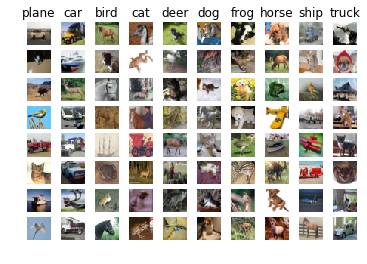

In [6]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
shape and color of the wrongly labeled images are kind of similar to the right label. So it is somewhat reasonable to mistakely label them.

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [7]:
print(X_train_feats.shape)

(49000, 155)


In [67]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_acc=0
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
for ld in [0.8,0.95,0.98]:
    for lr in [1,1e-2,1e-3]:
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=2000, batch_size=128,
                        learning_rate=lr, learning_rate_decay=ld,
                        reg=0.001, verbose=True)
            print(stats['num_dead']/(128*500))
            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            print ('decay = %f, lr = %f, Valid_accuracy: %f' %(ld, lr,val_acc))
            if val_acc > best_acc:
                best_acc = val_acc
                best_net = net
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

iteration 0 / 2000: loss 2.302586
iteration 100 / 2000: loss 1.581657
iteration 200 / 2000: loss 1.638193
iteration 300 / 2000: loss 1.400067
iteration 400 / 2000: loss 1.458699
iteration 500 / 2000: loss 1.293963
iteration 600 / 2000: loss 1.177829
iteration 700 / 2000: loss 1.412609
iteration 800 / 2000: loss 1.298270
iteration 900 / 2000: loss 1.321875
iteration 1000 / 2000: loss 1.461383
iteration 1100 / 2000: loss 1.158077
iteration 1200 / 2000: loss 1.319463
iteration 1300 / 2000: loss 1.189277
iteration 1400 / 2000: loss 1.229858
iteration 1500 / 2000: loss 1.546896
iteration 1600 / 2000: loss 1.326013
iteration 1700 / 2000: loss 1.459997
iteration 1800 / 2000: loss 1.423815
iteration 1900 / 2000: loss 1.247314
0.711453125
decay = 0.800000, lr = 1.000000, Valid_accuracy: 0.574000
iteration 0 / 2000: loss 1.266448
iteration 100 / 2000: loss 1.310036
iteration 200 / 2000: loss 1.231943
iteration 300 / 2000: loss 1.314967
iteration 400 / 2000: loss 1.380097
iteration 500 / 2000: lo

In [68]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.578


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!

In [4]:
print(X_train_feats.shape)

(49000, 155)


In [5]:
from cs231n.classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10


best_net = None
best_acc=0
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
for ld in [0.8,0.95,0.98]:
    for lr in [1,1e-2,1e-3]:
            net = TwoLayerNet(input_dim, hidden_dim, num_classes)
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=2000, batch_size=128,
                        learning_rate=lr, learning_rate_decay=ld,
                        reg=0.001, verbose=True)
            print(stats['num_dead']/(128*500))
            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            print ('decay = %f, lr = %f, Valid_accuracy: %f' %(ld, lr,val_acc))
            if val_acc > best_acc:
                best_acc = val_acc
                best_net = net

iteration 0 / 2000: loss 2.302586 percentage of dead neurons 0.748906
iteration 100 / 2000: loss 1.603333 percentage of dead neurons 0.706578
iteration 200 / 2000: loss 1.411181 percentage of dead neurons 0.759219
iteration 300 / 2000: loss 1.315321 percentage of dead neurons 0.782953
iteration 400 / 2000: loss 1.488491 percentage of dead neurons 0.794016
iteration 500 / 2000: loss 1.411238 percentage of dead neurons 0.812234
iteration 600 / 2000: loss 1.185706 percentage of dead neurons 0.822141
iteration 700 / 2000: loss 1.315623 percentage of dead neurons 0.836141
iteration 800 / 2000: loss 1.312000 percentage of dead neurons 0.834734
iteration 900 / 2000: loss 1.301638 percentage of dead neurons 0.840328
iteration 1000 / 2000: loss 1.492252 percentage of dead neurons 0.843500
iteration 1100 / 2000: loss 1.363536 percentage of dead neurons 0.847547
iteration 1200 / 2000: loss 1.506593 percentage of dead neurons 0.847109
iteration 1300 / 2000: loss 1.270503 percentage of dead neurons

iteration 900 / 2000: loss 2.302619 percentage of dead neurons 0.761219
iteration 1000 / 2000: loss 2.302647 percentage of dead neurons 0.762047
iteration 1100 / 2000: loss 2.302570 percentage of dead neurons 0.760109
iteration 1200 / 2000: loss 2.302675 percentage of dead neurons 0.761078
iteration 1300 / 2000: loss 2.302692 percentage of dead neurons 0.767750
iteration 1400 / 2000: loss 2.302687 percentage of dead neurons 0.757844
iteration 1500 / 2000: loss 2.302439 percentage of dead neurons 0.766969
iteration 1600 / 2000: loss 2.302538 percentage of dead neurons 0.760656
iteration 1700 / 2000: loss 2.302464 percentage of dead neurons 0.766359
iteration 1800 / 2000: loss 2.302502 percentage of dead neurons 0.769813
iteration 1900 / 2000: loss 2.302601 percentage of dead neurons 0.764047
0.76596875
decay = 0.950000, lr = 0.001000, Valid_accuracy: 0.098000
iteration 0 / 2000: loss 2.302586 percentage of dead neurons 0.755875
iteration 100 / 2000: loss 1.557934 percentage of dead neur

In [12]:
from cs231n.classifiers.neural_net_bonus import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_acc=0
################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
pass
for ld in [0.92]:
    for lr in [1e-2]:
        for regg in [0.001]:
            stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
                    num_iters=8000, batch_size=128,
                        learning_rate=lr, learning_rate_decay=ld,
                        reg=regg, verbose=True)
            print("percentage of dead relu")
            print(stats['num_dead']/(128*500))
            # Predict on the validation set
            val_acc = (net.predict(X_val_feats) == y_val).mean()
            print ('decay = %f, lr = %f, reg=%f Valid_accuracy: %f' %(ld, lr,regg, val_acc))
            if val_acc > best_acc:
                best_acc = val_acc
                best_net = net

iteration 0 / 8000: loss 2.302586 dying percentage 0.501281
iteration 100 / 8000: loss 2.302940 dying percentage 0.499047
iteration 200 / 8000: loss 2.302711 dying percentage 0.495906
iteration 300 / 8000: loss 2.303194 dying percentage 0.490484
iteration 400 / 8000: loss 2.302905 dying percentage 0.490469
iteration 500 / 8000: loss 2.302875 dying percentage 0.484672
iteration 600 / 8000: loss 2.302797 dying percentage 0.496828
iteration 700 / 8000: loss 2.302564 dying percentage 0.483750
iteration 800 / 8000: loss 2.302508 dying percentage 0.479281
iteration 900 / 8000: loss 2.302049 dying percentage 0.467750
iteration 1000 / 8000: loss 2.302219 dying percentage 0.472250
iteration 1100 / 8000: loss 2.301549 dying percentage 0.469953
iteration 1200 / 8000: loss 2.299990 dying percentage 0.444641
iteration 1300 / 8000: loss 2.298702 dying percentage 0.437656
iteration 1400 / 8000: loss 2.294094 dying percentage 0.457359
iteration 1500 / 8000: loss 2.282701 dying percentage 0.446750
iter

In [13]:
test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.506


In [ ]:
"in my bonus part, I tried to record the percentage of dead neurons in the two layer network"
"for Relu, the percentage of dead neurons is around 78%"
"I recorded each iteration but for iteration 0, it's calculated after the first gradient descent, dead neurons achieved 75%"
"I tried using leaky Relu though there can't be any dying neurons in leaky relu, but I tried to count the percentage of
"neurons that are muliplied by arf which I call weak neurons"
"indeed, the percentage of weak neurons is about 38% which is significantly less than that of Relu"
"however, I tried a lot of hyper-parameters, the perfermance didn't increase a lot"